In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [5]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
X = df.drop("target", axis=1)
y = df['target']

In [8]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier

DecisionTreeClassifier(criterion='entropy')

In [14]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4, 0.9, 'x[3] <= 0.8\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.2, 0.5, 'x[2] <= 5.0\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

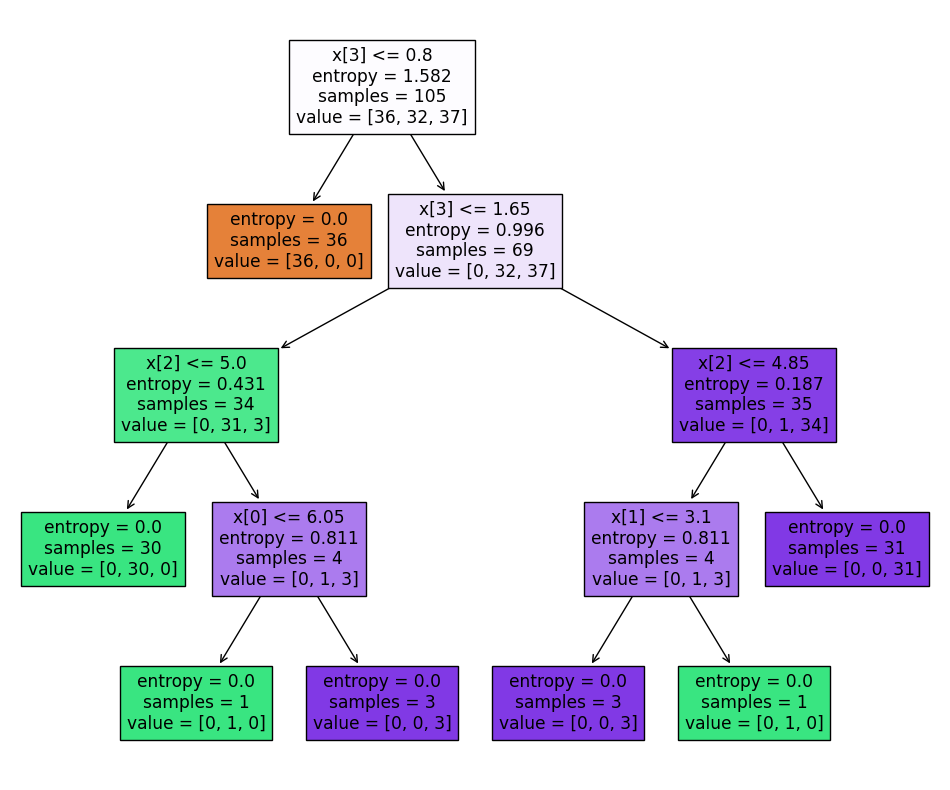

In [15]:
from sklearn import tree
plt.figure(figsize = (12, 10))
tree.plot_tree(classifier, filled = True)

In [16]:
classifier.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [20]:
#post pruning
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth = 2)
classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]')]

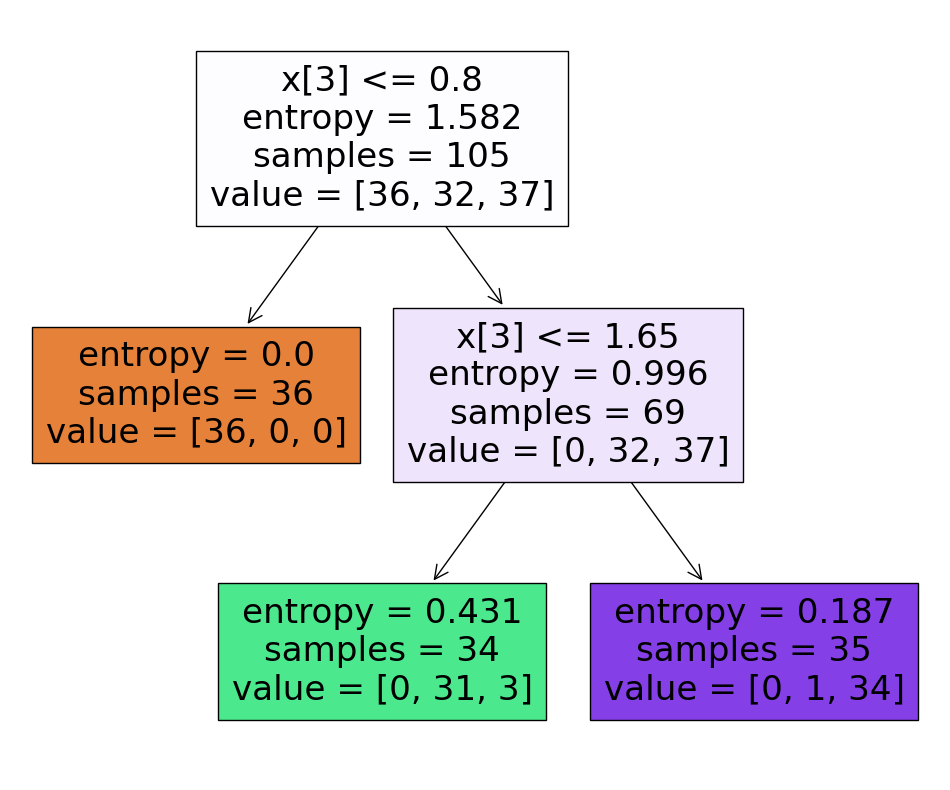

In [21]:
from sklearn import tree
plt.figure(figsize = (12, 10))
tree.plot_tree(classifier, filled = True)

In [22]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [24]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.9555555555555556

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [27]:
#prepruning>> hyperparameter tuning
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth':[1, 2, 3, 4, 6, 8],
    'splitter':['best', 'random'],
    'max_features': ['sqrt', 'log2']
}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [30]:
model = GridSearchCV(clf, param_grid=parameter, cv = 5, scoring = "accuracy")
model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [31]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [32]:
model.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [33]:
model.best_score_

0.9714285714285715